In [1]:
import numpy as np;
import scipy as sp;
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
#Zadatak 1: 
#a) Nacrtati Bodeov dijagram funkcije prenosa W(s)=50000/s(s+10)(s+50)
#b) Oderediti brzinsku konstantu, presecnu ucestanost pojacanja, presecnu ucestanost faze i faznu i amplitudsku marginu
#d) Dizajnirati diferencijalni kompenzator koji obezbedjuje propusni opseg > 20 rad/s, i faznu marginu >50 stepeni
#e) Nacrtati finalni Bodeov dijagram funkcije prenosa D(s)W(s) i proveriti da li su ispunjene specifikacije
#f) Nacrtati odskocne i nagibne odzive kompenzovanog i nekompenzovanog sistema sa zatvorenom povratnom spregom

In [2]:
W=signal.lti([], [0, -10, -50], 50000)

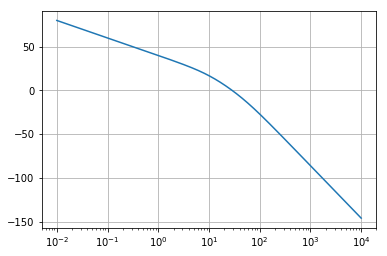

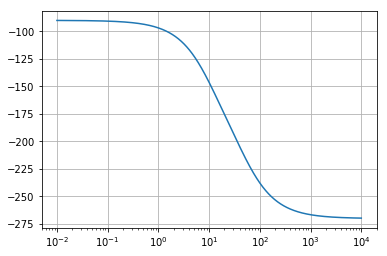

In [3]:
# a)
w_log=np.logspace(-2,4,num=1000)
w, mag, phase = signal.bode(W,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [4]:
# b) brzinska konstanta
Kv=500

In [5]:
# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))

Presecna ucestanost pojacanja: 28.41


In [6]:
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Fazna margina: -10.21


In [7]:
# presecna ucestanost faze
w_pi=w[phase[:]>=-180][-1]
print("Presecna ucestanost faze:",round(w_pi,2))

Presecna ucestanost faze: 22.15


In [8]:
# amplitudska margina
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina:",round(d,2))

Amplitudska margina: 0.59


In [9]:
#Potrebno je povecati faznu marginu za 60 stepeni
# Biramo otprilike 1/alpha=20  (obezbedjuje maksimalno fazno prednjacanje od 65)
# Biramo nulu tako da postize maksimalnu fazu oko trazene presecne ucestanosti - isprobavanjem
# Prvo probamo a=5, b=100, znaci D(s)=(s/5+1)/(s/100+1)=20(s+5)/(s+100)

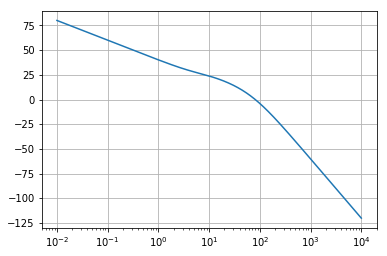

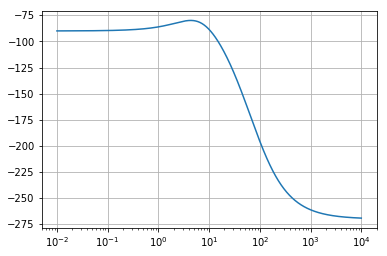

Presecna ucestanost pojacanja: 80.15
Fazna margina: -3.21


In [10]:
W2=signal.lti([-5], [0, -10, -50, -100], 20*50000)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

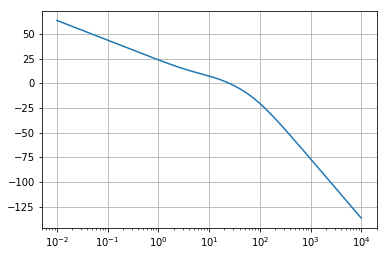

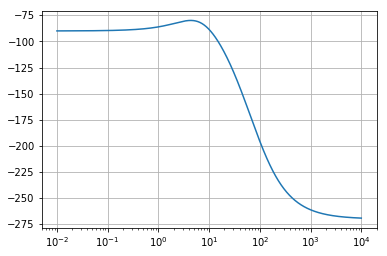

Presecna ucestanost pojacanja: 24.4
Fazna margina: 60.98


In [11]:
# nova presecna ucestanost je prevelika - mozemo da unesemo slabljenje (dozvoljeno je jer pojacanje nije specificirano)
#isprobavanjem dobijamo da prihvaljtive parametre za K=0.15:
W2=signal.lti([-5], [0, -10, -50, -100], 0.15*20*50000)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

In [12]:
#e) Ispunjeni su kriterijumi za gore izabran kompenzator

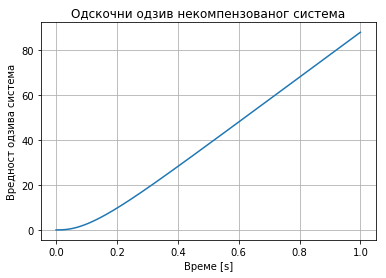

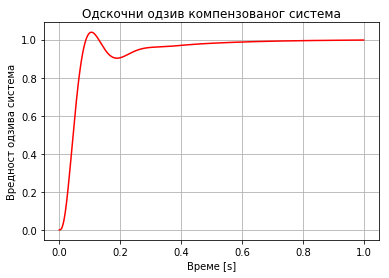

In [13]:
#d) Odredjujemo funkciju spregnutog prenosa G(s)=W(s)/1+W(s) , W(s)=0.15*20*50000(s+5)/s(s+10)(s+50)(s+100)

brojilac=[0.15*20*50000, 0.15*20*50000*5]
imenilac1=sp.convolve(sp.convolve(sp.convolve([1,0],[1,10]),[1,50]),[1,100])
imenilac=imenilac1+[0, 0, 0, 0.15*20*50000, 0.15*20*50000*5]
G2=signal.lti(brojilac,imenilac)

# originlni sistem je nestabilan

imenilac2=sp.convolve(sp.convolve([1,0],[1,10]),[1,50])
G1=signal.lti([50000],imenilac2)


t=np.linspace(0,1,1000)

tt,y1=G1.step(T=t)
tt,y2=G2.step(T=t)
plt.plot(tt,y1)
plt.title("Одскочни одзив некомпензованог система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

plt.plot(tt,y2,'r')
plt.title("Одскочни одзив компензованог система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

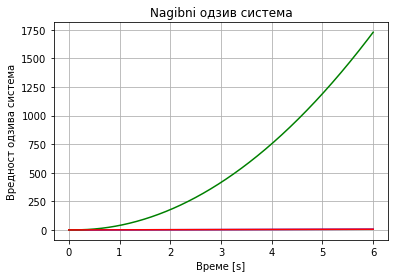

In [23]:
# Odzivi na jedinicne nagibne pobude
t=np.linspace(0,6,1000)
tt,y1,x1=signal.lsim(G1,t,t)
tt,y2,x2=signal.lsim(G2,t,t)
plt.plot(tt,tt,'b',tt,y1,'g',tt,y2,'r')
plt.title("Nagibni одзив система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()